<a href="https://colab.research.google.com/github/The-Godfatherr/Face-Mask-Detection/blob/master/face_mask_training_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define the directory structure
base_dirs = [
    'dataset/train/with_mask',
    'dataset/train/without_mask',
    'dataset/val/with_mask',
    'dataset/val/without_mask'
]

# Create the directories
for dir_path in base_dirs:
    os.makedirs(dir_path, exist_ok=True)

print("Dataset directory structure created successfully.")


Dataset directory structure created successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [12]:
train_dir ='/content/dataset/train'
val_dir = '/content/dataset/val'

img_size = 128
batch_size = 32
epochs = 15

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

import os

if not os.path.exists(train_dir):
    print(f"Error: Training directory not found at {train_dir}")
else:
    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary'
    )

if not os.path.exists(val_dir):
    print(f"Error: Validation directory not found at {val_dir}")
else:
    val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary'
    )

Found 4092 images belonging to 2 classes.
Found 4090 images belonging to 2 classes.


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(train_gen, epochs=epochs, validation_data=val_gen)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 50/128 ━━━━━━━━━━━━━━━━━━━━ 50s 649ms/step - accuracy: 0.6551 - loss: 0.5963

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


128/128 ━━━━━━━━━━━━━━━━━━━━ 116s 893ms/step - accuracy: 0.7578 - loss: 0.4665 - val_accuracy: 0.9215 - val_loss: 0.2256
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 112s 876ms/step - accuracy: 0.9193 - loss: 0.2360 - val_accuracy: 0.9318 - val_loss: 0.1806
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 112s 875ms/step - accuracy: 0.9226 - loss: 0.2106 - val_accuracy: 0.9342 - val_loss: 0.1637
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 111s 866ms/step - accuracy: 0.9335 - loss: 0.1886 - val_accuracy: 0.9450 - val_loss: 0.1390
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 111s 868ms/step - accuracy: 0.9336 - loss: 0.1756 - val_accuracy: 0.9303 - val_loss: 0.2238
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 125s 980ms/step - accuracy: 0.9243 - loss: 0.1999 - val_accuracy: 0.9557 - val_loss: 0.1134
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 116s 907ms/step - accuracy: 0.9391 - loss: 0.1657 - val_accuracy: 0.9489 - val_loss: 0.1297
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 112s 875ms/step - accuracy: 0.9397 - loss: 0.15

In [17]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


128/128 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.9706 - loss: 0.0682
Validation Accuracy: 97.14%


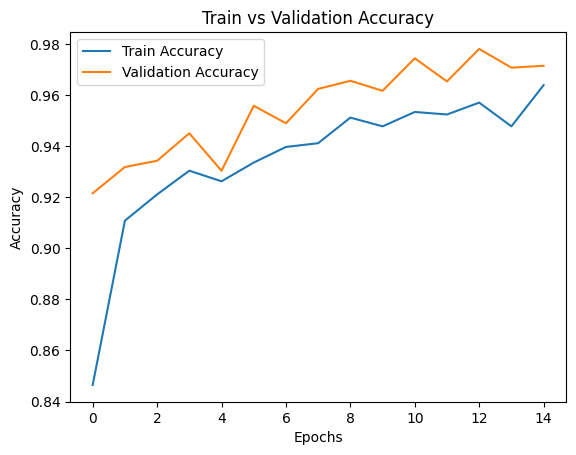

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()
